# EXTRACCIÓN DE DATOS

En esta fase cargamos el archivo (.csv / .xls) con el que vamos a trabajar. 

A modo de *best practice*, vamos a cargar también las librerías que emplearemos durante el proceso de EDA

Las librerías básica a importar serán: 
- Pandas
- Matplotlib.Pyplot
- Seaborn
- Numpy
- Missingno
- OS

Por otro lado vamos a desactivar los *warnings* y configurar los parámetros de impresión de *print()* para poder visualizar todos los datos.

Lo que vemos ahora es una primera aproximación a los datos con los que vamos a trabajar.

In [1]:
# Importar las librerías:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
np.set_printoptions(precision = 3, threshold=sys.maxsize)
import missingno as msno
import os

#Desactivar los warnings:
import warnings
warnings.filterwarnings('ignore')

#Importar el archivo .csv / .xls: 
link = ('C:/Users/Pablo/anaconda/anaconda3/datasets/casoamazon/amazon.csv')
df = pd.read_csv(link, sep=';') # empleamos "sep" para indicar el tipo de separador del csv. El separador por defecto es ",".
df.head(3)

# Condicionamos la impresión de "print" para que muestre todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# PREPARACIÓN Y LIMPIEZA DE LOS DATOS

En esta fase vamos a dotar a las columnas de las propiedades necesarias para un análisis fructífero. Estableceremos el tipo de dato que contiene cada columna (en caso de que la lectura automática de Python no sea correcta).

Uno de los aspectos relevantes a cosiderar será el formato de la fecha (si hubiera series temporales).

A su vez, debemos eliminar aquellas variables que no aporten valor a nuestro análisis. Entre ellas, intentaremos descartar aquellas variables que estén intrínsecamente relacionadas con el pronóstico / análisis que queramos hacer o aquellas que sean simplemente descriptivas de los individuos encuestados (edad, raza, etc.).

Otra de las actuaciones a destacar será el cambio del nombre de nuestras columnas, de forma que mejoremos la interpretabilidad y el acceso al análisis. Para ello accederemos al diccionario de variables indluido en nuestro dataset.

Por último, en cuanto a la limpieza de los datos, el propio dataset establece que los valores 97, 98 y 99 corresponden a respuestas no dadas por los encuestados. En tal caso, deben ser sustituidas por un nulo. A su vez, existen varias celdas que vienen vacías. A modo rutinario, vamos a sustiuir los vacíos '' y ' ' por nulo para facilitar su conversión a float.

In [2]:
# Cambiar el formato de la fecha:
df['DOI']=pd.to_datetime(df['DOI'], format = '%m/%d/%Y')

In [3]:
# Eliminamos aquellas columnas no relevantes
elim = ['uid', 'poverq', 'soverq', 'Q19', 'repur', 'recomm', 'VN_1009_Q20A', 'VN_1009_TP21_6specify', 'work', 'age', 'race', 'pincome', 'income', 'educat', 'childsupp', 'marital', 'gender', 'house']
df = df.drop(elim, axis = 1)
df.head(3)

,company_v,satis,pq,VN_1009_TP01,VN_1009_TP02,VN_1009_TP03,VN_1009_TP04,VN_1009_TP05,VN_1009_TP06,VN_1009_TP07,VN_1009_TP08,VN_1009_TP09,VN_1009_TP10,VN_1009_TP11,VN_1009_TP12,VN_1009_TP13,VN_1009_TP14,VN_1009_TP15,VN_1009_TP16,VN_1009_TP17,VN_1009_TP18,VN_1009_TP19,VN_1009_TP20,VN_1009_TP21,VN_1009_TP24_1,VN_1009_TP24_2,VN_1009_TP22,VN_1009_TP23,Q9C_P,Q9D,VN_1009_TP25A,DOI
0,ZALORA,7,6,6,7,6,7,8,8,6,6,6,7,7,8,7,6,6,9,8,7,9,1,5,2,2,,,1,90,2,2018-01-29
1,FAVE,7,8,8,7,7,6,8,9,7,8,97,8,8,7,7,97,97,7,8,8,6,1,1,1,2,7,,6,80,3,2018-01-29
2,FAVE,6,7,8,7,6,8,7,8,6,6,6,8,7,7,8,6,97,7,7,7,8,1,1,1,1,6,7,4,35,1,2018-02-01


In [4]:
# Eliminamos las respuestas no dadas en la encuesta y los espacios
df = df.replace({' ':None,'':None, 97:None,98:None,99:None,'97':None,'98':None,'99':None})

In [5]:
# Generamos un diccionario de conversiones que nos facilitará la tarea de convertir los datos de las columnas y 
# aplicamos la transformación: 
dict_conv = {'VN_1009_TP20': 'category',
             'VN_1009_TP21': 'category',
             'VN_1009_TP22': float,
             'VN_1009_TP23': float,
             'VN_1009_TP24_1': 'category',
             'VN_1009_TP24_2': 'category',
             'VN_1009_TP25A': 'category'}
df = df.astype(dict_conv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company_v       1600 non-null   object        
 1   satis           1600 non-null   int64         
 2   pq              1600 non-null   int64         
 3   VN_1009_TP01    1600 non-null   int64         
 4   VN_1009_TP02    1600 non-null   int64         
 5   VN_1009_TP03    1600 non-null   int64         
 6   VN_1009_TP04    1600 non-null   int64         
 7   VN_1009_TP05    1600 non-null   int64         
 8   VN_1009_TP06    1600 non-null   int64         
 9   VN_1009_TP07    1600 non-null   int64         
 10  VN_1009_TP08    1600 non-null   int64         
 11  VN_1009_TP09    1424 non-null   float64       
 12  VN_1009_TP10    1600 non-null   int64         
 13  VN_1009_TP11    1600 non-null   int64         
 14  VN_1009_TP12    1600 non-null   int64         
 15  VN_1

In [6]:
# Cambiamos el nombre de nuestras columnas a través de un diccionario de excel.
dicc = ('C:/Users/Pablo/anaconda/anaconda3/datasets/casoamazon/diccionario.xlsx')
diccionario = pd.read_excel(dicc, index_col = 0, header = 0).to_dict()
df_variables_cambiadas = df.rename(columns = diccionario['Description'])

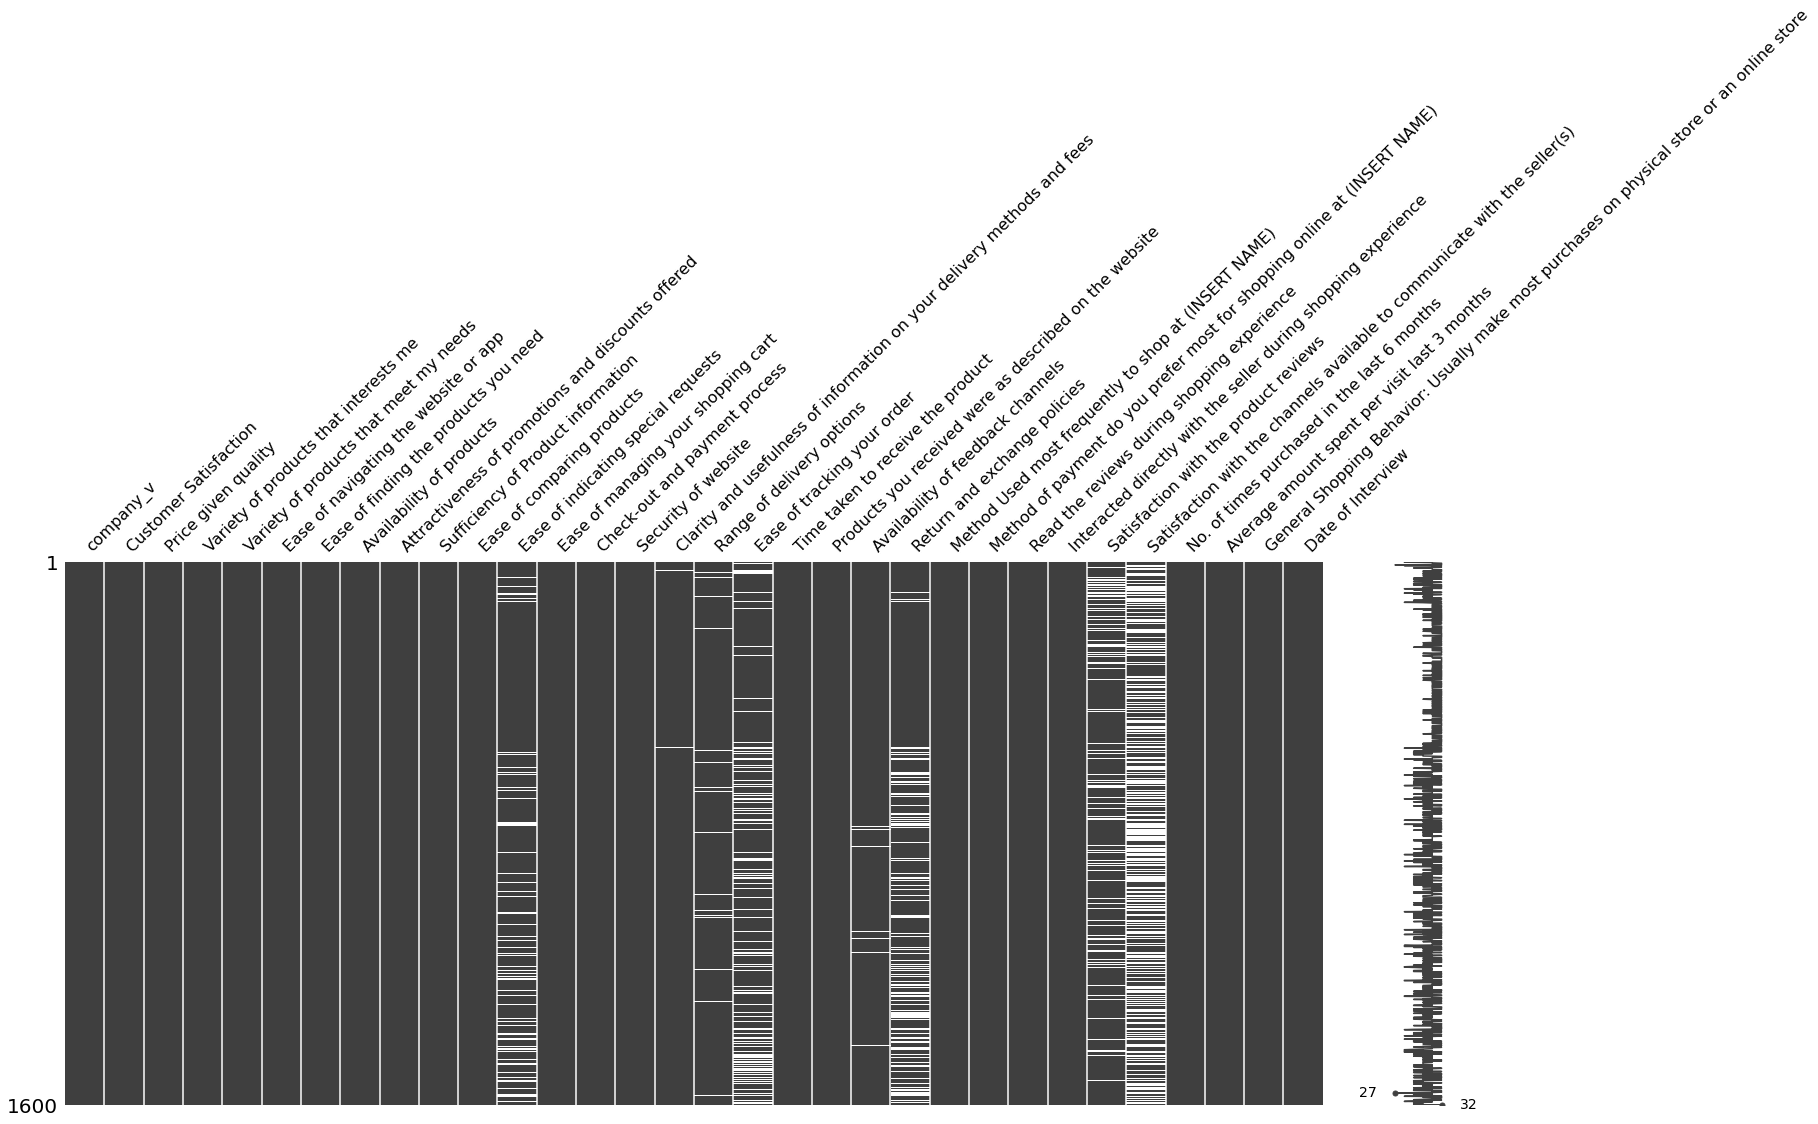

In [7]:
# Generamos la visualización de datos nulos
msno.matrix(df_variables_cambiadas)

# ANÁLISIS DE LOS DATOS

En un primer momento, vamos a representar las estadísticas de las principales variables del análisis, estudiando su centralidad y variabilidad, de forma que podamos entender la distribución de las mismas.

En una fase posterior, vamos a visualizar esos datos con respecto a Amazon únicamente, para acabar comparando los valores con la media del mercado. Este análisis nos permite identificar en qué punto Amazon se aleja más de los estándares del mercado y en qué aspecto debería centrarse.

Por último, realizaremos una correlación (Pearson) para cuantificar la relación entre las distintas variables.

Conociendo los dos puntos anteriores, podemos emitir un juicio sobre qué aspectos serían los principales a abordar por Amazon.

In [8]:
# Ahora vamos a realizar el análisis estadístico de las distintas variables:
print('Variables numéricas: '+'\n\n'+ str(df_variables_cambiadas.describe(include = ['int64', 'float'])))

Variables numéricas: 

       Customer Satisfaction  Price given quality  \
count            1600.000000          1600.000000   
mean                7.575625             7.573125   
std                 1.192233             1.363200   
min                 2.000000             2.000000   
25%                 7.000000             7.000000   
50%                 8.000000             8.000000   
75%                 8.000000             8.000000   
max                10.000000            10.000000   

       Variety of products that interests me  \
count                            1600.000000   
mean                                7.858125   
std                                 1.046987   
min                                 3.000000   
25%                                 7.000000   
50%                                 8.000000   
75%                                 9.000000   
max                                10.000000   

       Variety of products that meet my needs  \
count            

In [9]:
df_amz = df[df['company_v']=='AMAZON']

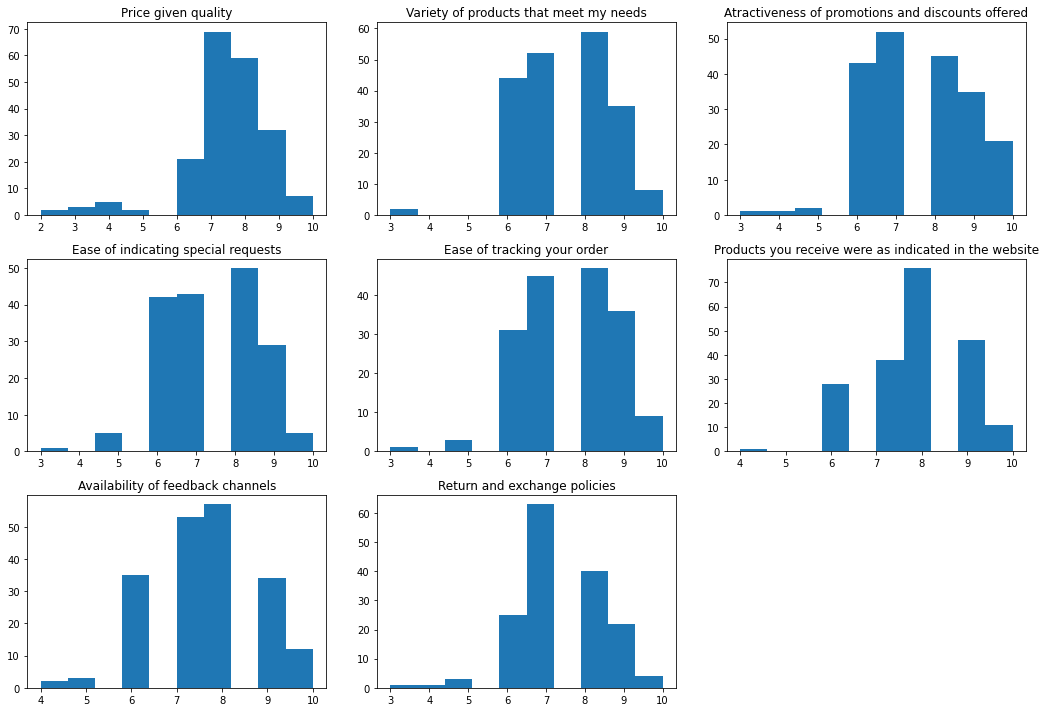

In [10]:
# Visualizamos los datos referentes a Amazon 
princ_variables=plt.figure(figsize=(15,10))

var_pq = princ_variables.add_subplot(3,3,1)
var_vn1009tp02=princ_variables.add_subplot(3,3,2)
var_vn1009tp06=princ_variables.add_subplot(3,3,3)
var_vn1009tp09=princ_variables.add_subplot(3,3,4)
var_vn1009tp15=princ_variables.add_subplot(3,3,5)
var_vn1009tp17=princ_variables.add_subplot(3,3,6)
var_vn1009tp18=princ_variables.add_subplot(3,3,7)
var_vn1009tp19=princ_variables.add_subplot(3,3,8)



var_pq.hist(df_amz['pq'])
var_pq.set_title('Price given quality')

var_vn1009tp02.hist(df_amz['VN_1009_TP02'])
var_vn1009tp02.set_title('Variety of products that meet my needs')

var_vn1009tp06.hist(df_amz['VN_1009_TP06'])
var_vn1009tp06.set_title('Atractiveness of promotions and discounts offered')

var_vn1009tp09.hist(df_amz['VN_1009_TP09'])
var_vn1009tp09.set_title('Ease of indicating special requests')

var_vn1009tp15.hist(df_amz['VN_1009_TP15'])
var_vn1009tp15.set_title('Ease of tracking your order')

var_vn1009tp17.hist(df_amz['VN_1009_TP17'])
var_vn1009tp17.set_title('Products you receive were as indicated in the website')

var_vn1009tp18.hist(df_amz['VN_1009_TP18'])
var_vn1009tp18.set_title('Availability of feedback channels')

var_vn1009tp19.hist(df_amz['VN_1009_TP19'])
var_vn1009tp19.set_title('Return and exchange policies')

plt.tight_layout()
plt.show()

In [11]:
# Diferencia entre la media de Amazon y del resto de Big Players.
med_amazon = df[df['company_v'] == 'AMAZON'].mean()
counts = df['company_v'].value_counts()
importantes = counts[counts == 200]
merc_imp = df[df['company_v'].isin(importantes.index)]
med_merc = merc_imp.mean()
diferencia = (med_amazon - med_merc)*100
desv = ['Q9D']
diferencia = pd.DataFrame(diferencia.drop(desv), columns = ['Diferencia'])
diferencia = diferencia.rename(index = diccionario['Description'])

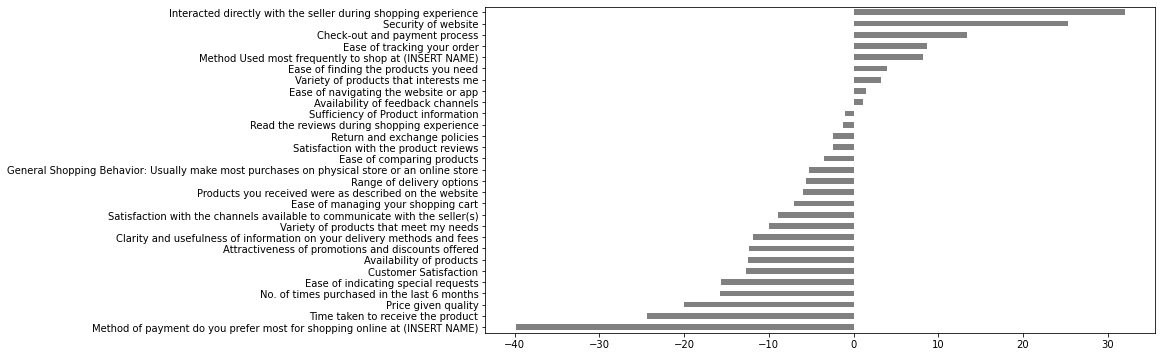

In [12]:
diferencia['Diferencia'].sort_values(ascending = True).plot(kind = 'barh', color = 'grey', figsize = (12,6))
plt.show()

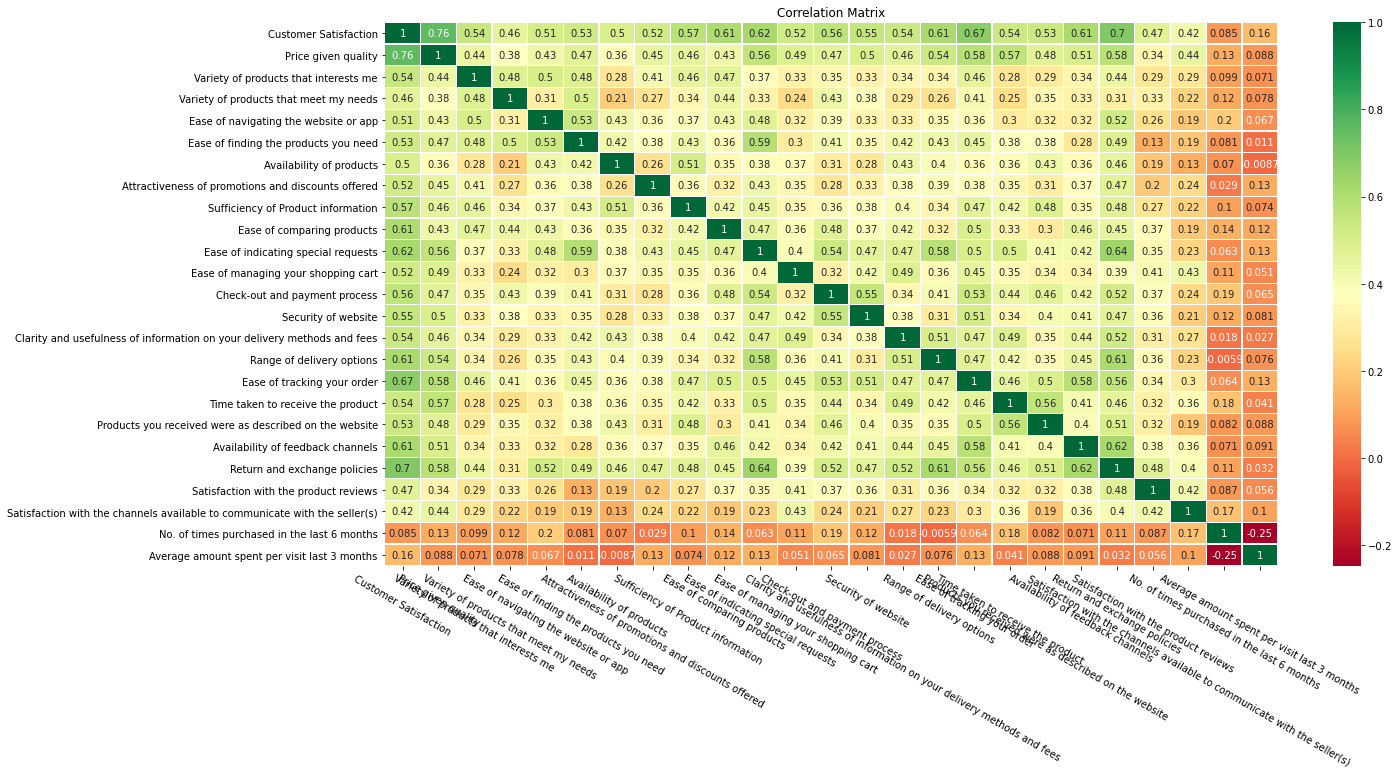

In [13]:
# Matriz de correlación
corr = df_variables_cambiadas[df_variables_cambiadas['company_v']=='AMAZON'].corr(method = 'pearson')
cor_plot = sns.heatmap(corr, annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10}, xticklabels = True, yticklabels = True)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Los parámetros que presentan peor situación con respecto al mercado son:
- Price given quality
- Time taken to receive the product

Estos parámetros pueden reflejar la tendencia general del mercado a apostar por productos de OEM y que los productos de Amazon no se están sirviendo localmente.

A su vez, vemos la importancia de la variable "Ease to indicate special request", donde Amazon se encuentra también por debajo del mercado.

Con respecto al análisis de correlación, los parámetros que aparecen como más relevantes son:
- Price given quality
- Ease of tracking your order
- Return and exchange policies

Parece pues evidente que el principal punto a abordar será precisamente el Price given Quality, pues no solo está muy por debajo de la media del mercado sino que está fuertemente relacionada con la satisfacción del cliente.

Por último, vamos a realizar un análisis similar con el competidor directo de Amazon, Qoo10, para ver cuales son sus puntos fuertes y débiles. En caso de encontrar una relación con los de Amazon nos dará información vital de las potenciales Quick Wins. 

In [14]:
# Diferencia entre la media de Qoo10 y del resto de Big Players.
med_qoo10 = df[df['company_v'] == 'QOO10'].mean()
counts = df['company_v'].value_counts()
importantes = counts[counts == 200]
merc_imp = df[df['company_v'].isin(importantes.index)]
med_merc = merc_imp.mean()
diferencia = (med_qoo10 - med_merc)*100
desv = ['Q9D']
diferencia = pd.DataFrame(diferencia.drop(desv), columns = ['Diferencia'])
diferencia = diferencia.rename(index = diccionario['Description'])

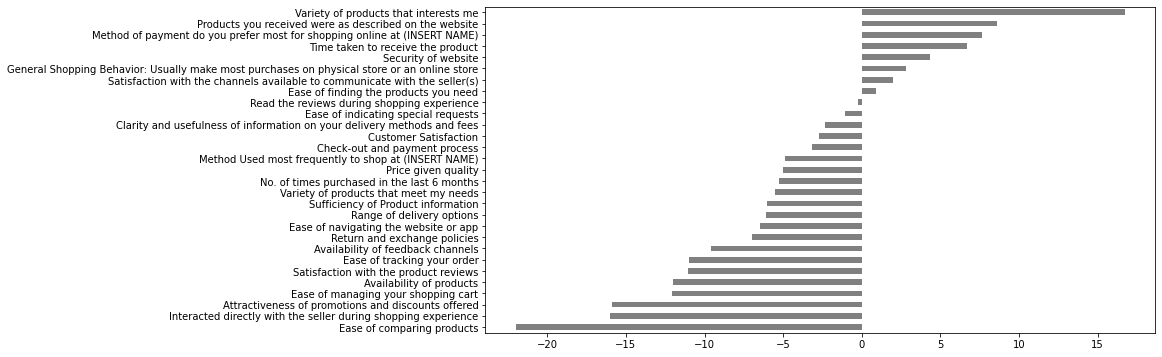

In [15]:
diferencia['Diferencia'].sort_values(ascending = True).plot(kind = 'barh', color = 'grey', figsize = (12,6))

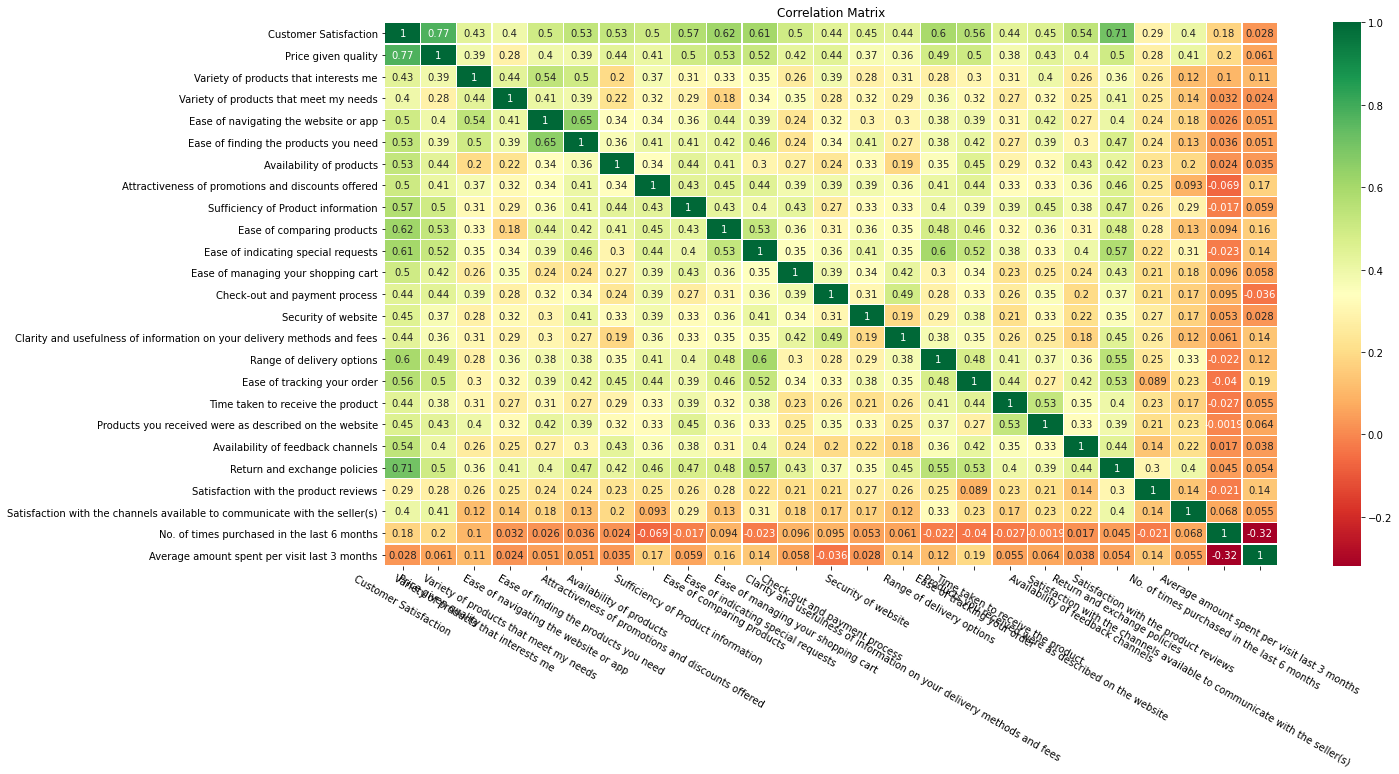

In [16]:
corr = df_variables_cambiadas[df_variables_cambiadas['company_v']=='QOO10'].corr(method = 'pearson')
cor_plot = sns.heatmap(corr, annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10}, xticklabels = True, yticklabels = True)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Ante estos resultados vemos que las variables Price given Quality y Return Exchange Policies también están fuertemente relacionadas con la satisfacción general de los clientes de Qoo10. No tanto la facilidad para indicar solicitudes especiales.

Las victorias a corto plazo, por tanto, deben estar centradas en estos dos aspectos. Ambos competidores se encuentran por debajo de la media de mercado en ambas, por ello, pequeñas mejoras en la política de devoluciones o en la calidad / precio de Amazon pueden representar un papel fundamental en la mejora de la satisfacción general de Amazon.